In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [33]:
df = pd.read_csv('../data/market_integrates_100.csv')
print(df)



     market_ids  firm_ids  characteristic1  characteristic2    prices  \
0             1         1         5.433865        20.042325  4.042316   
1             1         2         5.907737        20.412709  3.215516   
2             1         3         5.943911        20.174390  3.599365   
3             1         4         5.329441        20.844997  3.609258   
4             1         5         5.083033        20.137079  4.378925   
..          ...       ...              ...              ...       ...   
995         100         6         5.360283        20.580602  4.795188   
996         100         7         5.958183        20.650134  4.080402   
997         100         8         5.184745        20.346844  3.319145   
998         100         9         5.223118        20.464959  3.578026   
999         100        10         5.019838        20.675947  4.337036   

     marginal_cost    shares   profits   markups  e_quantity    capital  \
0         1.580903  0.023678  0.058281  2.556966

In [34]:
# df_grouped = df.groupby('product')
# print(df_grouped)
# # Look at the firm with bad product charactristics
# group1 = df_grouped.get_group(2)
# # Look at a firm with good product characteristics
# group4 = df_grouped.get_group(4)



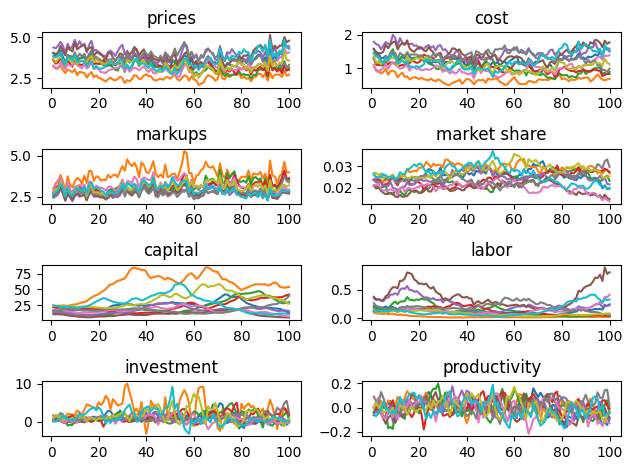

In [39]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]] = plt.subplots(4, 2)

for firm in df['firm_ids'].unique():
    df_firm = df[df['firm_ids'] == firm]
    ax1.plot(df_firm.market_ids, df_firm.prices)
    ax2.plot(df_firm.market_ids, df_firm.marginal_cost)
    ax3.plot(df_firm.market_ids, df_firm.markups)
    ax4.plot(df_firm.market_ids, df_firm.shares)
    ax5.plot(df_firm.market_ids, df_firm.capital)
    ax6.plot(df_firm.market_ids, df_firm.labor)
    ax7.plot(df_firm.market_ids, df_firm.investment)
    ax8.plot(df_firm.market_ids, df_firm.productivity)


ax1.set_title('prices')
ax2.set_title('cost')
ax3.set_title('markups')
ax4.set_title('market share')
ax5.set_title('capital')
ax6.set_title('labor')
ax7.set_title('investment')
ax8.set_title('productivity')



plt.tight_layout()
plt.show()

In [36]:
# df_cc = pd.read_csv('../data/market_constant_cost100.csv')
df_grouped_cc = df.groupby('firm_ids')
# Look at the firm with bad product charactristics
group1_cc = df_grouped_cc.get_group(2)
# Look at a firm with good product characteristics
group4_cc = df_grouped_cc.get_group(4)




AttributeError: 'DataFrame' object has no attribute 'price'

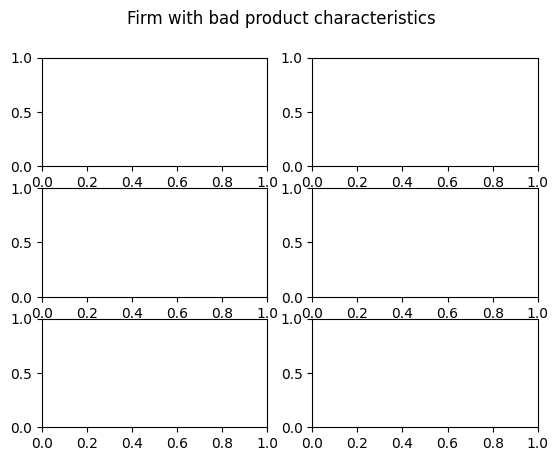

In [37]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2)
fig.suptitle(f'Firm with bad product characteristics')

ax1.plot(group1_cc.market_ids, group1_cc.price)
ax2.plot(group1_cc.market_ids, group1_cc.productivity)
ax3.plot(group1_cc.market_ids, group1_cc.markups)
ax4.plot(group1_cc.market_ids, group1_cc.mshare)
ax5.plot(group1_cc.market_ids, group1_cc.capital)
ax6.plot(group1_cc.market_ids, group1_cc.marginal_cost)

ax1.set_title('price')
ax2.set_title('productivity')
ax3.set_title('markups')
ax4.set_title('market share')
ax5.set_title('capital')
ax6.set_title('costs')

plt.tight_layout()
plt.show()


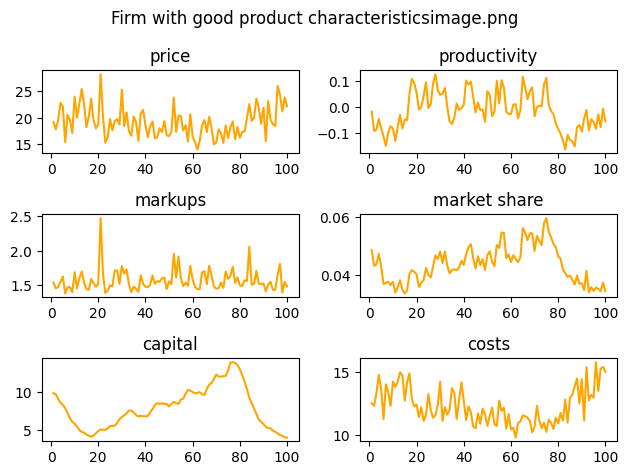

In [ ]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2)
fig.suptitle(f'Firm with good product characteristicsimage.png')

ax1.plot(group4_cc.market_ids, group4_cc.price, color='orange')
ax2.plot(group4_cc.market_ids, group4_cc.productivity, color='orange')
ax3.plot(group4_cc.market_ids, group4_cc.markups, color='orange')
ax4.plot(group4_cc.market_ids, group4_cc.mshare, color='orange')
ax5.plot(group4_cc.market_ids, group4_cc.capital, color='orange')
ax6.plot(group4_cc.market_ids, group4_cc.marginal_cost, color='orange')

ax1.set_title('price')
ax2.set_title('productivity')
ax3.set_title('markups')
ax4.set_title('market share')
ax5.set_title('capital')
ax6.set_title('costs')

plt.tight_layout()
plt.show()

<Axes: >

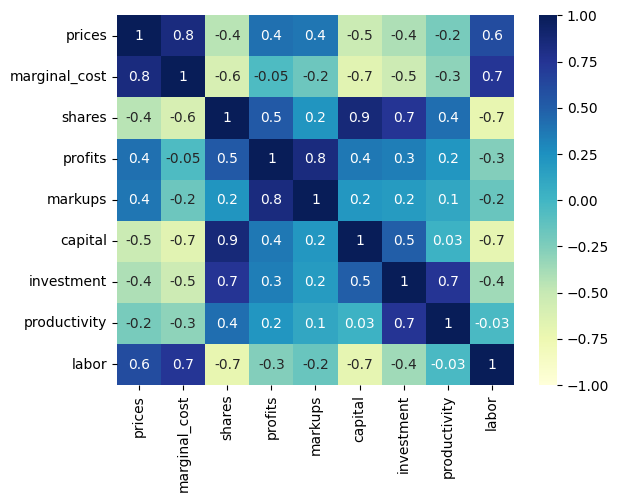

In [ ]:
heatmap_df = df.drop(['market_ids','firm_ids', 'characteristic1', 'characteristic2', 'e_quantity'], axis=1)
sns.heatmap(heatmap_df.corr(), vmin = -1., vmax=1., cmap="YlGnBu", annot=True, fmt='.1g')
